In [27]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, inspect
import matplotlib.pyplot as plt
from sqlalchemy.types import VARCHAR, INTEGER, FLOAT, DATETIME

In [2]:
#Set file path for csv
filepath = 'minneapolis_st_paul_weather_data_to_2023.csv'

In [3]:
#Read in CSV and store to dateframe
df = pd.read_csv(filepath)

In [4]:
#check data types
df.dtypes

Date                               object
Maximum Temperature degrees (F)    object
Minimum Temperature degrees (F)    object
Precipitation (inches)             object
Snow (inches)                      object
Snow Depth (inches)                object
dtype: object

In [5]:
df.head()

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,4/9/2023,66,47,T,0.00,T
1,4/8/2023,67,37,0.00,0.00,T
2,4/7/2023,51,26,0.00,0.00,T
3,4/6/2023,38,22,0.00,0.00,T
4,4/5/2023,37,25,0.01,T,T


In [6]:
#Replace Trace values with 0s, Ms with NaN
df = df.replace({'T':'0','M':np.nan})

In [7]:
#Drop NAs
df = df.dropna()

In [8]:
#Change data types for each field
df['Date'] = pd.to_datetime(df['Date'])
df['Maximum Temperature degrees (F)'] = df['Maximum Temperature degrees (F)'].astype('int64')
df['Minimum Temperature degrees (F)'] = df['Minimum Temperature degrees (F)'].astype('int64')
df['Snow (inches)'] = df['Snow (inches)'].astype('float64')
df['Precipitation (inches)'] = df['Precipitation (inches)'].astype('float64')
df['Snow Depth (inches)'] = df['Snow Depth (inches)'].astype('float64')

In [9]:
#Check data types were converted
df.dtypes

Date                               datetime64[ns]
Maximum Temperature degrees (F)             int64
Minimum Temperature degrees (F)             int64
Precipitation (inches)                    float64
Snow (inches)                             float64
Snow Depth (inches)                       float64
dtype: object

In [10]:
#Change Column Names
df = df.rename(columns={'Maximum Temperature degrees (F)':'MaxTemp',
                        'Minimum Temperature degrees (F)':'MinTemp',
                        'Snow (inches)':'SnowFall',
                        'Precipitation (inches)':'Precipitation',
                        'Snow Depth (inches)':'SnowDepth'})

In [11]:
#Check Column Names
df

,Date,MaxTemp,MinTemp,Precipitation,SnowFall,SnowDepth
0,2023-04-09,66,47,0.00,0.0,0.0
1,2023-04-08,67,37,0.00,0.0,0.0
2,2023-04-07,51,26,0.00,0.0,0.0
3,2023-04-06,38,22,0.00,0.0,0.0
4,2023-04-05,37,25,0.01,0.0,0.0
...,...,...,...,...,...,...
45384,1899-01-05,13,-5,0.00,0.0,3.0
45385,1899-01-04,22,0,0.00,0.0,3.0
45386,1899-01-03,32,21,0.00,0.0,3.0
45387,1899-01-02,29,10,0.00,0.0,3.0


In [12]:
#Add a month and year column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [13]:
#Check Columns were applied
df.head()

,Date,MaxTemp,MinTemp,Precipitation,SnowFall,SnowDepth,Year,Month
0,2023-04-09,66,47,0.00,0.0,0.0,2023,4
1,2023-04-08,67,37,0.00,0.0,0.0,2023,4
2,2023-04-07,51,26,0.00,0.0,0.0,2023,4
3,2023-04-06,38,22,0.00,0.0,0.0,2023,4
4,2023-04-05,37,25,0.01,0.0,0.0,2023,4


In [14]:
#Create new dataframe that aggregates data by season
seasons = df.loc[(df['Month'] == 1) | 
                  (df['Month'] == 2) |
                  (df['Month'] == 12),:]

In [15]:
#Create Empty column for Season
seasons['Season'] = ''

/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#Create new seasons variable that defines each winter season,Dec-Feb as a year
for ind in seasons.index:
    if seasons["Month"][ind] == 1 or seasons["Month"][ind] == 2:
        seasons['Season'][ind] = seasons['Year'][ind]
    elif seasons["Month"][ind] == 12:
        seasons['Season'][ind] = seasons['Year'][ind] + 1

/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [17]:
#Check that variables were correctly added
seasons.head(70)

,Date,MaxTemp,MinTemp,Precipitation,SnowFall,SnowDepth,Year,Month,Season
40,2023-02-28,40,20,0.00,0.0,10.0,2023,2,2023
41,2023-02-27,34,28,0.48,0.0,11.0,2023,2,2023
42,2023-02-26,33,5,0.00,0.0,12.0,2023,2,2023
43,2023-02-25,26,3,0.00,0.0,12.0,2023,2,2023
44,2023-02-24,11,-8,0.00,0.3,13.0,2023,2,2023
...,...,...,...,...,...,...,...,...,...
105,2022-12-25,8,-4,0.00,0.0,10.0,2022,12,2023
106,2022-12-24,7,-5,0.00,0.0,10.0,2022,12,2023
107,2022-12-23,-2,-12,0.00,0.0,11.0,2022,12,2023
108,2022-12-22,-4,-11,0.04,0.7,12.0,2022,12,2023


In [18]:
seasons['SnowBase_6in']=''

/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
#Create variable for days with more than 6 inches of snow cover
for ind in seasons.index:
    if seasons["SnowDepth"][ind] >= 6:
        seasons['SnowBase_6in'][ind] = 1
    else:
        seasons['SnowBase_6in'][ind] = 0

/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [20]:
#Change snowbase to integer
seasons['SnowBase_6in'] = seasons['SnowBase_6in'].astype('int64')

/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#Summarize data by season and store into DataFrames
Max = seasons.groupby('Season').mean()['MaxTemp']
Min = seasons.groupby('Season').mean()['MinTemp']
Precip = seasons.groupby('Season').sum()['Precipitation']
Snow = seasons.groupby('Season').sum()['SnowFall']
Base = seasons.groupby('Season').sum()['SnowBase_6in']

MaxDf = pd.DataFrame(Max)
MinDf= pd.DataFrame(Min)
PrecipDf = pd.DataFrame(Precip)
SnowDf = pd.DataFrame(Snow)
BaseDf = pd.DataFrame(Base)
MaxDf

,MaxTemp
Season,
1899,19.271186
1900,25.833333
1901,24.311111
1902,25.566667
1903,23.522222
...,...
2019,24.988889
2020,29.142857
2021,26.866667


In [22]:
#Merge DataFrames together to create one summary df
Summary = pd.merge(MaxDf,MinDf,on='Season')
Summary = pd.merge(Summary,PrecipDf,on='Season')
Summary = pd.merge(Summary,SnowDf,on='Season')
Summary = pd.merge(Summary,BaseDf,on='Season')
Summary

,MaxTemp,MinTemp,Precipitation,SnowFall,SnowBase_6in
Season,,,,,
1899,19.271186,2.559322,1.64,23.2,20
1900,25.833333,8.933333,2.30,17.1,4
1901,24.311111,8.277778,0.94,14.6,0
1902,25.566667,9.577778,1.37,16.9,0
1903,23.522222,6.400000,3.33,30.8,22
...,...,...,...,...,...
2019,24.988889,10.633333,4.55,52.5,21
2020,29.142857,14.098901,3.38,28.6,52
2021,26.866667,13.000000,2.15,26.1,65


In [23]:
Summary = Summary.rename(columns={'MaxTemp':'AvgMaxTemp',
                                  'MinTemp':'AvgMinTemp',
                                  'Precipitation':'TotalPrecip',
                                  'SnowFall':'TotalSnowfall',
                                  'SnowBase_6in':'Total_Days_6in_Base'})


In [24]:
#Remove 1899
Summary = Summary.loc[(Summary.index != 1899),:]
Summary

,AvgMaxTemp,AvgMinTemp,TotalPrecip,TotalSnowfall,Total_Days_6in_Base
Season,,,,,
1900,25.833333,8.933333,2.30,17.1,4
1901,24.311111,8.277778,0.94,14.6,0
1902,25.566667,9.577778,1.37,16.9,0
1903,23.522222,6.400000,3.33,30.8,22
1904,16.329670,0.505495,1.82,30.0,26
...,...,...,...,...,...
2019,24.988889,10.633333,4.55,52.5,21
2020,29.142857,14.098901,3.38,28.6,52
2021,26.866667,13.000000,2.15,26.1,65


In [25]:
#Create 5 year rolling avg
Summary['MaxRolling5Year'] = Summary['AvgMaxTemp'].rolling(5).mean()
Summary['MinRolling5Year'] = Summary['AvgMinTemp'].rolling(5).mean()
Summary

,AvgMaxTemp,AvgMinTemp,TotalPrecip,TotalSnowfall,Total_Days_6in_Base,MaxRolling5Year,MinRolling5Year
Season,,,,,,,
1900,25.833333,8.933333,2.30,17.1,4,NaN,NaN
1901,24.311111,8.277778,0.94,14.6,0,NaN,NaN
1902,25.566667,9.577778,1.37,16.9,0,NaN,NaN
1903,23.522222,6.400000,3.33,30.8,22,NaN,NaN
1904,16.329670,0.505495,1.82,30.0,26,23.112601,6.738877
...,...,...,...,...,...,...,...
2019,24.988889,10.633333,4.55,52.5,21,27.319316,13.357534
2020,29.142857,14.098901,3.38,28.6,52,28.121221,13.852869
2021,26.866667,13.000000,2.15,26.1,65,27.433016,12.830891


In [248]:
Summary.to_csv('WeatherDB.csv')
df.to_csv('DailyWeather.csv')

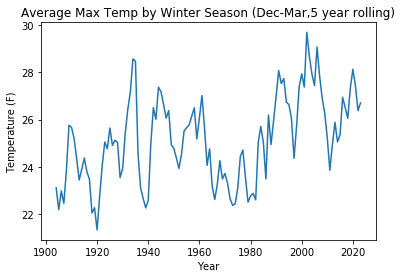

In [147]:
#Plot Max temp
plt.plot(Summary.index,Summary['MaxRolling5Year'])
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Average Max Temp by Winter Season (Dec-Mar,5 year rolling)')
plt.savefig("MaxTemp.png")

In [26]:
#Create engine and make connection
engine = create_engine('sqlite:///Weather2.db', echo=True)
sqlite_connection = engine.connect()

In [299]:
#Define table schema
engine.execute('''CREATE TABLE Weather (Season INTEGER PRIMARY KEY,
              AvgMaxTemp NUMERIC,
              AvgMinTemp NUMERIC,
              TotalPrecip NUMERIC,
              TotalSnowfall NUMERIC,
              Total_Days_6in_Base INTEGER,
              MaxRolling5Year NUMERIC,
              MinRolling5Year NUMERIC)''')

2023-04-13 22:05:59,957 INFO sqlalchemy.engine.Engine CREATE TABLE Weather (Season INTEGER PRIMARY KEY,
              AvgMaxTemp NUMERIC,
              AvgMinTemp NUMERIC,
              TotalPrecip NUMERIC,
              TotalSnowfall NUMERIC,
              Total_Days_6in_Base INTEGER,
              MaxRolling5Year NUMERIC,
              MinRolling5Year NUMERIC)


INFO:sqlalchemy.engine.Engine:CREATE TABLE Weather (Season INTEGER PRIMARY KEY,
              AvgMaxTemp NUMERIC,
              AvgMinTemp NUMERIC,
              TotalPrecip NUMERIC,
              TotalSnowfall NUMERIC,
              Total_Days_6in_Base INTEGER,
              MaxRolling5Year NUMERIC,
              MinRolling5Year NUMERIC)


2023-04-13 22:05:59,971 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-04-13 22:05:59,984 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


In [300]:
#Export pandas dataframe into sqllite table we created
sqlite_table = "Weather"
Summary.to_sql(sqlite_table, sqlite_connection, if_exists='append',index=False)

2023-04-13 22:06:03,993 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Weather")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Weather")


2023-04-13 22:06:03,999 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-04-13 22:06:04,011 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-04-13 22:06:04,060 INFO sqlalchemy.engine.Engine INSERT INTO "Weather" ("Season", "AvgMaxTemp", "AvgMinTemp", "TotalPrecip", "TotalSnowfall", "Total_Days_6in_Base", "MaxRolling5Year", "MinRolling5Year") VALUES (?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO "Weather" ("Season", "AvgMaxTemp", "AvgMinTemp", "TotalPrecip", "TotalSnowfall", "Total_Days_6in_Base", "MaxRolling5Year", "MinRolling5Year") VALUES (?, ?, ?, ?, ?, ?, ?, ?)


2023-04-13 22:06:04,064 INFO sqlalchemy.engine.Engine [generated in 0.04772s] ((1900, 25.833333333333332, 8.933333333333334, 2.3, 17.099999999999998, 4, None, None), (1901, 24.31111111111111, 8.277777777777779, 0.9400000000000001, 14.6, 0, None, None), (1902, 25.566666666666666, 9.577777777777778, 1.37, 16.900000000000002, 0, None, None), (1903, 23.522222222222222, 6.4, 3.3300000000000005, 30.8, 22, None, None), (1904, 16.32967032967033, 0.5054945054945055, 1.8200000000000007, 30.0, 26, 23.112600732600733, 6.738876678876679), (1905, 21.244444444444444, 4.955555555555556, 1.9100000000000006, 29.800000000000004, 17, 22.194822954822953, 5.943321123321123), (1906, 28.255555555555556, 12.1, 1.9600000000000002, 24.099999999999998, 17, 22.98371184371184, 6.707765567765567), (1907, 22.944444444444443, 6.566666666666666, 2.4499999999999993, 33.0, 32, 22.4592673992674, 6.105543345543346)  ... displaying 10 of 124 total bound parameter sets ...  (2022, 25.844444444444445, 7.388888888888889, 3.370

INFO:sqlalchemy.engine.Engine:[generated in 0.04772s] ((1900, 25.833333333333332, 8.933333333333334, 2.3, 17.099999999999998, 4, None, None), (1901, 24.31111111111111, 8.277777777777779, 0.9400000000000001, 14.6, 0, None, None), (1902, 25.566666666666666, 9.577777777777778, 1.37, 16.900000000000002, 0, None, None), (1903, 23.522222222222222, 6.4, 3.3300000000000005, 30.8, 22, None, None), (1904, 16.32967032967033, 0.5054945054945055, 1.8200000000000007, 30.0, 26, 23.112600732600733, 6.738876678876679), (1905, 21.244444444444444, 4.955555555555556, 1.9100000000000006, 29.800000000000004, 17, 22.194822954822953, 5.943321123321123), (1906, 28.255555555555556, 12.1, 1.9600000000000002, 24.099999999999998, 17, 22.98371184371184, 6.707765567765567), (1907, 22.944444444444443, 6.566666666666666, 2.4499999999999993, 33.0, 32, 22.4592673992674, 6.105543345543346)  ... displaying 10 of 124 total bound parameter sets ...  (2022, 25.844444444444445, 7.388888888888889, 3.3700000000000006, 42.3, 34,

2023-04-13 22:06:04,071 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-04-13 22:06:04,075 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2023-04-13 22:06:04,085 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


In [28]:
#Remove extra columns
df = df[['Date','MaxTemp','MinTemp','Precipitation','SnowFall','SnowDepth']]

In [34]:
engine.execute('DROP TABLE DailyWeather')

2023-04-14 07:49:31,965 INFO sqlalchemy.engine.Engine DROP TABLE DailyWeather
2023-04-14 07:49:31,967 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-04-14 07:49:31,973 INFO sqlalchemy.engine.Engine COMMIT


In [35]:
#Define schema for Daily Weather table
engine.execute('''CREATE TABLE DailyWeather (Date DATETIME PRIMARY KEY,
              MaxTemp INTEGER,
              MinTemp INTEGER,
              Precipitation NUMERIC,
              Snowfall NUMERIC,
              SnowDepth NUMERIC)''')

2023-04-14 07:49:35,757 INFO sqlalchemy.engine.Engine CREATE TABLE DailyWeather (Date DATETIME PRIMARY KEY,
              MaxTemp INTEGER,
              MinTemp INTEGER,
              Precipitation NUMERIC,
              Snowfall NUMERIC,
              SnowDepth NUMERIC)
2023-04-14 07:49:35,759 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-04-14 07:49:35,762 INFO sqlalchemy.engine.Engine COMMIT


In [36]:
#Export dataframe into created table
sqlite_table = "DailyWeather"
df.to_sql(sqlite_table, sqlite_connection, if_exists='append',index=False)

2023-04-14 07:49:39,806 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("DailyWeather")
2023-04-14 07:49:39,807 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-04-14 07:49:39,841 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-04-14 07:49:40,548 INFO sqlalchemy.engine.Engine INSERT INTO "DailyWeather" ("Date", "MaxTemp", "MinTemp", "Precipitation", "SnowFall", "SnowDepth") VALUES (?, ?, ?, ?, ?, ?)
2023-04-14 07:49:40,548 INFO sqlalchemy.engine.Engine [generated in 0.63896s] (('2023-04-09 00:00:00.000000', 66, 47, 0.0, 0.0, 0.0), ('2023-04-08 00:00:00.000000', 67, 37, 0.0, 0.0, 0.0), ('2023-04-07 00:00:00.000000', 51, 26, 0.0, 0.0, 0.0), ('2023-04-06 00:00:00.000000', 38, 22, 0.0, 0.0, 0.0), ('2023-04-05 00:00:00.000000', 37, 25, 0.01, 0.0, 0.0), ('2023-04-04 00:00:00.000000', 38, 34, 0.06, 0.0, 0.0), ('2023-04-03 00:00:00.000000', 44, 35, 0.0, 0.0, 2.0), ('2023-04-02 00:00:00.000000', 51, 25, 0.0, 0.0, 6.0)  ... displaying 10 of 45348 total bound parameter sets ...  ('1899-01